# Project: Bootstrap in Data Science Interviews

# Question 1: Bootstrap and Confidence Interval

# How to use a bootstrap method to estimate the population parameter?

# step 1: simulate population distribution

In [121]:
import numpy as np 
import matplotlib.pyplot as plt

np.random.seed(123) # to set seed for consistency 
weight_pop = np.random.randint(100,240,size = 500000)# simulated population distribution
weight_pop

array([209, 226, 166, ..., 197, 175, 121])

In [124]:
np.mean(weight_pop)# population mean

169.633012

In [125]:
np.std(weight_pop)# population std

40.39571209680374

# step 2: take a random sample from the population

In [9]:
weight_sample = np.random.choice(weight_pop, size = 1000)

In [11]:
sample_mean = np.mean(weight_sample)# sample mean
sample_mean

168.774

In [12]:
sample_std = np.std(weight_sample)# sample std
sample_std

39.965121343491504

# step 3: bootstrap for 10,000 times

In [67]:
boot_means = []
for _ in range(10000):
    boot_sample = np.random.choice(weight_sample,replace = True, size = 100) # take a random sample each iteration
    boot_mean = np.mean(boot_sample)# calculate the mean for each iteration
    boot_means.append(boot_mean) # append the mean to boot_means
boot_means_np = np.array(boot_means) # transform it into a numpy array for calculation

In [68]:
type(boot_means_np)

numpy.ndarray

In [69]:
boot_means_np

array([173.69, 175.71, 166.98, ..., 162.39, 166.67, 168.04])

# step 4: analysis and interpretation

In [70]:
boot_means = np.mean(boot_means_np)# bootstrapped sample means
boot_means

168.693657

In [75]:
np.mean(weight_pop)# recall: true population mean

169.633012

In [71]:
boot_std = np.std(boot_means_np) # bootstrapped std
boot_std

3.9941369751613434

In [72]:
np.percentile(boot_means_np, [2.5,97.5])# 95% C.I.

array([160.71, 176.49])

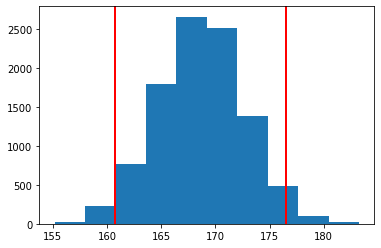

In [73]:
plt.hist(boot_means_np, alpha = 1)
plt.axvline(np.percentile(boot_means_np,2.5),color = 'red',linewidth=2)
plt.axvline(np.percentile(boot_means_np,97.5),color = 'red',linewidth=2)

# Interpretation
- true population mean: 169.633012, as identified above in step 1
- bootstrapped population mean: 168.693657, as identified in step 4
- bootstrapped 95% confidence interval: [160.71, 176.49], which includes the true population mean.
- Conclusion: bootstrap allows us to estimate the true population parameter even if we only have one single sample. 

---

# Question 2 Bootstrap and Standard Errors

# If you only know a median for a dataset of size 10, how do you calculate the standard error of the median? 

# Follow-up questions of bootstrap:
    - how many samples do I like? 
    - why? 
    - any bias/variance? 

In [23]:
import numpy as np 
pop = np.random.randint(200,size = 100)

In [114]:
# step 1: take a random sample of 10
np.random.seed(13)
sample_1= np.random.choice(pop,10)
sample_1

array([150, 108, 100, 164,  79, 156, 161,  57,  15,   4])

In [111]:
# step 2: what's the median of this sample (sample_1)?

# write a function to calculate the median value

def median_value(some):
    
    n = len(some)
    
    some.sort()
    
    if n % 2 == 0: 
        median1 = some[n//2]
        median2 = some[n//2-1]
        median = (median1+median2)/2
    
    else: 
        median = some[n//2]
        
    return median 

In [112]:
median_value(sample_1)

104.0

In [104]:
# step 3: repeatedly sample from the sample (sample_1) with replacement, aka. bootstrap

boot_sample_medians = []

for i in range(10000):
    
    boot_sample = np.random.choice(sample_1,replace = True, size = 6)
    
    boot_median = median_value(boot_sample)
    
    boot_sample_medians.append(boot_median)

In [105]:
# step 4: stand error and confidence interval  
# std
np.std(boot_sample_medians)

34.22214058321747

In [106]:
# C.I.
# wide CI for small sample sizes, b/c of limited sampling possibilities and large variation
boot_median_CI = np.percentile(boot_sample_medians, [2.5,97.5])
boot_median_CI

array([ 36. , 158.5])

---